In [1]:
https://www.datacamp.com/tutorial/convolutional-neural-networks-python

SyntaxError: invalid syntax (674358397.py, line 1)

### Fashion-MNIST 数据集
在继续加载数据之前，最好先看看您将要使用什么！Fashion-MNIST数据集是 Zalando 文章图片的数据集，包含来自 10 个类别的 70,000 种时尚产品的 28x28 灰度图像，每个类别有 7,000 张图像。训练集有 60,000 张图像，测试集有 10,000 张图像。加载数据后，您可以稍后再仔细检查！ ;)

Fashion-MNIST 与您可能已经知道的 MNIST 数据集类似，您可以使用该数据集对手写数字进行分类。这意味着图像尺寸、训练和测试分割与 MNIST 数据集类似。提示：如果您想学习如何使用后者的数据集为分类任务实现多层感知器 (MLP)，请转到此 Keras 深度学习教程。

您可以在此处找到 Fashion-MNIST 数据集，但您也可以借助特定的 TensorFlow 和 Keras 模块加载它。您将在下一节中看到它的工作原理！

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


从上面的输出中，你可以看到训练数据的形状为 60000 x 28 x 28，因为每个 28 x 28 维度有 60,000 个训练样本。同样，测试数据的形状为 10000 x 28 x 28，因为有 10,000 个测试样本

In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

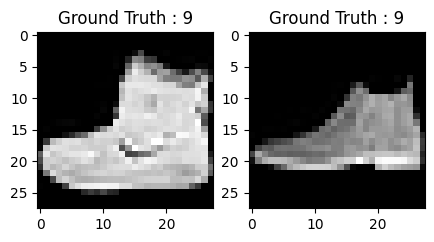

In [4]:
plt.figure(figsize=[5, 5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# 上面两个图的输出看起来像是踝靴，这个类被分配了 9 的类标签。同样，其他时尚产品会有不同的标签，但类似的产品会具有相同的标签。这意味着所有 7, 000 张踝靴图像的类标签都是 9。


In [5]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [9]:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

[![图像](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1512486717/fashion-mnist-architecture_htbpsz.png)]

In [16]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
# from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU


In [37]:
batch_size = 64
epochs = 20
num_classes = 10


In [38]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(
    3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [39]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [40]:
fashion_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,
                                  epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7535 - loss: 0.6858 - val_accuracy: 0.8699 - val_loss: 0.3535
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8940 - loss: 0.2938 - val_accuracy: 0.8972 - val_loss: 0.2776
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9106 - loss: 0.2418 - val_accuracy: 0.9059 - val_loss: 0.2504
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9214 - loss: 0.2113 - val_accuracy: 0.9087 - val_loss: 0.2482
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9320 - loss: 0.1806 - val_accuracy: 0.9174 - val_loss: 0.2248
Epoch 6/20
180/750 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9387 - loss: 0.1540

KeyboardInterrupt: 

In [23]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [24]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.5001698732376099
Test accuracy: 0.9144999980926514


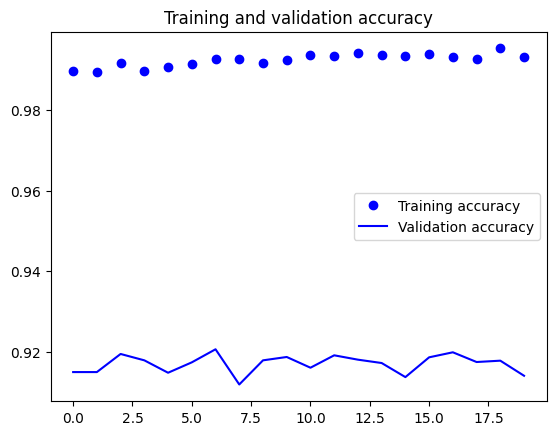

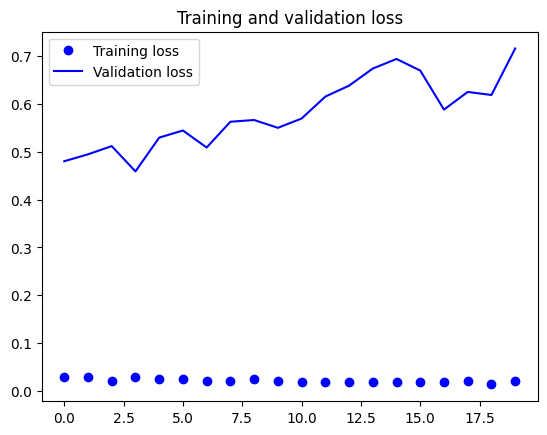

In [30]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [42]:
batch_size = 64
epochs = 20
num_classes = 10


In [43]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(
    3, 3), activation='linear', padding='same', input_shape=(28, 28, 1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [44]:
fashion_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [47]:
# fashion_train_dropout = fashion_model.fit(
#     train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))


fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,
                                  epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8717 - loss: 0.3495 - val_accuracy: 0.8949 - val_loss: 0.2814
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8841 - loss: 0.3122 - val_accuracy: 0.8997 - val_loss: 0.2675
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8950 - loss: 0.2850 - val_accuracy: 0.9016 - val_loss: 0.2586
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8993 - loss: 0.2704 - val_accuracy: 0.9137 - val_loss: 0.2376
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9030 - loss: 0.2600 - val_accuracy: 0.9093 - val_loss: 0.2431
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9049 - loss: 0.2540 - val_accuracy: 0.9108 - val_loss: 0.2415
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9116 - loss: 0.2409 - val_accuracy: 0.9137 - val_loss: 0.2365
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9121 - loss: 0.2326 - 

In [ ]:
fashion_model.save("fashion_model_dropout.h5py")


In [48]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9168 - loss: 0.2547


In [49]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.2502475380897522
Test accuracy: 0.9156000018119812


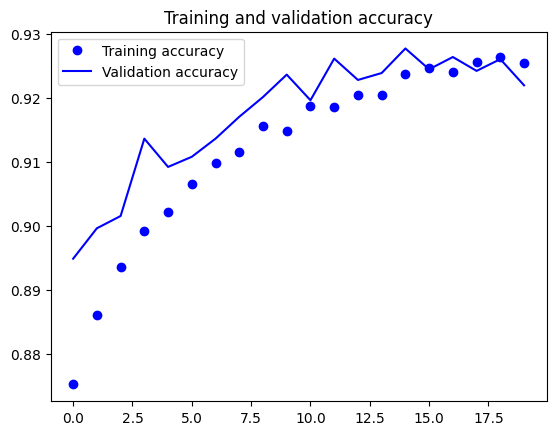

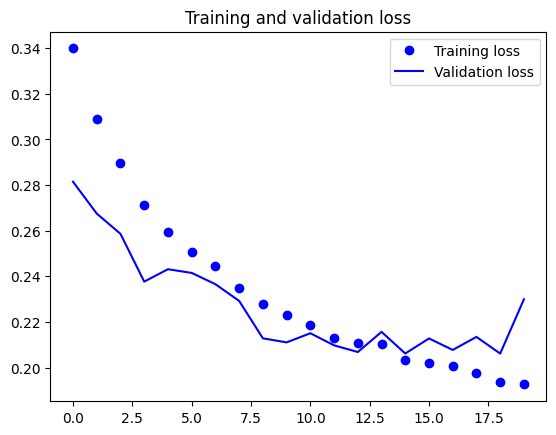

In [51]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [52]:
predicted_classes = fashion_model.predict(test_X)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [53]:
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)


In [54]:
predicted_classes.shape, test_Y.shape


((10000,), (10000,))

Found 9115 correct labels


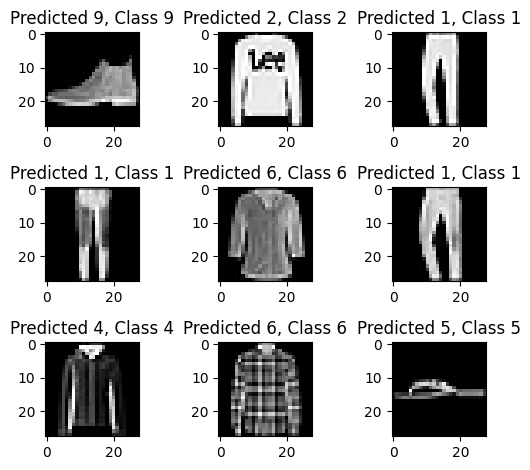

In [59]:
correct = np.where(predicted_classes == test_Y)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_X[correct].reshape(28, 28),
               cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(
        predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()


Found 885 incorrect labels


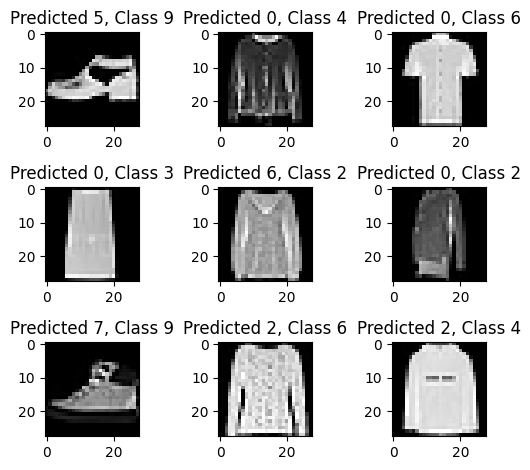

In [60]:
incorrect = np.where(predicted_classes != test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_X[incorrect].reshape(28, 28),
               cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(
        predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


In [61]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.78      0.91      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.81      0.92      0.86      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.91      0.80      0.85      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.84      0.69      0.76      1000
     Class 7       0.93      0.99      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



: 